1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


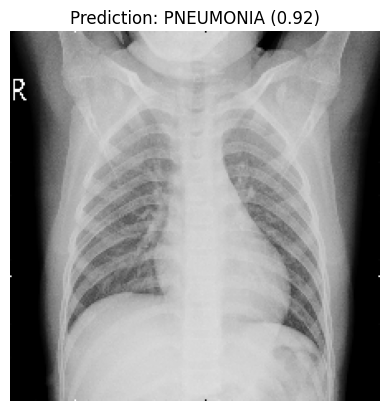

Kết quả: PNEUMONIA - Xác suất: 0.92


In [9]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input

# --- 1. Tải mô hình đã huấn luyện ---
model_path = 'my_resnet50_finetuned_reliable.keras'  # Đường dẫn mô hình đã lưu
model = keras.models.load_model(model_path)

# --- 2. Hàm dự đoán ảnh X-quang ---
def predict_image(image_path, model, img_size=(224, 224)):
    # Load và xử lý ảnh
    img = keras.utils.load_img(image_path, target_size=img_size)
    img_array = keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Dự đoán
    prob = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if prob > 0.5 else "NORMAL"

    # Hiển thị ảnh và kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({prob:.2f})")
    plt.show()

    return label, prob

# --- 3. Dự đoán ảnh mẫu ---
image_path = "/content/NORMAL2-IM-1427-0001.jpeg"  # Đường dẫn ảnh test
label, score = predict_image(image_path, model)
print(f"Kết quả: {label} - Xác suất: {score:.2f}")

In [11]:
from google.colab import files
files.download('/content/my_resnet50_finetuned_reliable.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import os
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array

# --- 1. Tải mô hình ---
model = keras.models.load_model('my_resnet50_finetuned_reliable.keras')

# --- 2. Hàm xử lý và dự đoán ảnh ---
def predict_image_batch(image_dir, model, img_size=(224, 224)):
    results = []

    # Lặp qua tất cả ảnh trong thư mục
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(image_dir, filename)
            try:
                # Load và xử lý ảnh
                img = load_img(path, target_size=img_size)
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)

                # Dự đoán
                prob = model.predict(img_array, verbose=0)[0][0]
                label = "PNEUMONIA" if prob > 0.5 else "NORMAL"

                results.append({
                    "filename": filename,
                    "label": label,
                    "probability": float(prob)
                })
            except Exception as e:
                print(f"Lỗi xử lý ảnh {filename}: {e}")

    return results

# --- 3. Chạy dự đoán cho toàn bộ ảnh trong thư mục ---
image_folder = "/content/drive/MyDrive/NORMAL(1)"  # Ví dụ thư mục chứa ảnh
batch_results = predict_image_batch(image_folder, model)

# --- 4. Hiển thị kết quả ---
for r in batch_results:
    print(f"{r['filename']}: {r['label']} ({r['probability']:.2f})")

NORMAL2-IM-1427-0001.jpeg: PNEUMONIA (0.92)
NORMAL2-IM-1437-0001.jpeg: NORMAL (0.26)
NORMAL2-IM-1430-0001.jpeg: NORMAL (0.25)
NORMAL2-IM-1442-0001.jpeg: NORMAL (0.04)
NORMAL2-IM-1436-0001.jpeg: NORMAL (0.04)
NORMAL2-IM-1440-0001.jpeg: NORMAL (0.05)
NORMAL2-IM-1431-0001.jpeg: PNEUMONIA (0.68)
NORMAL2-IM-1438-0001.jpeg: PNEUMONIA (0.85)


import os

for root, dirs, files in os.walk("/content/chest_xray", topdown=True):
    print(root)
    for d in dirs:
        print("  └──", d)


✅ Đã chia lại dữ liệu thành train (70%), val (10%), test (20%)
Nhân bản 1774 ảnh từ lớp NORMAL...
Found 5421 files belonging to 2 classes.
Found 539 files belonging to 2 classes.
Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 164s 182ms/step - accuracy: 0.5883 - loss: 1.0790 - val_accuracy: 0.8571 - val_loss: 0.4460
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 197s 152ms/step - accuracy: 0.6972 - loss: 0.8286 - val_accuracy: 0.8720 - val_loss: 0.4010
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 151s 160ms/step - accuracy: 0.7644 - loss: 0.7319 - val_accuracy: 0.8813 - val_loss: 0.3887
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 201s 159ms/step - accuracy: 0.7993 - loss: 0.7039 - val_accuracy: 0.8868 - val_loss: 0.3821
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 201s 152ms/step - accuracy: 0.7939 - loss: 0.7092 - val_accuracy: 0.8813 - val_loss: 0.3837
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 152ms/step - accuracy: 0.7877 - loss: 0.7030 - val_accuracy: 0.8813 - val_loss: 0.3836
Epoch 6/30
170/170 ━━━━━━━━━━

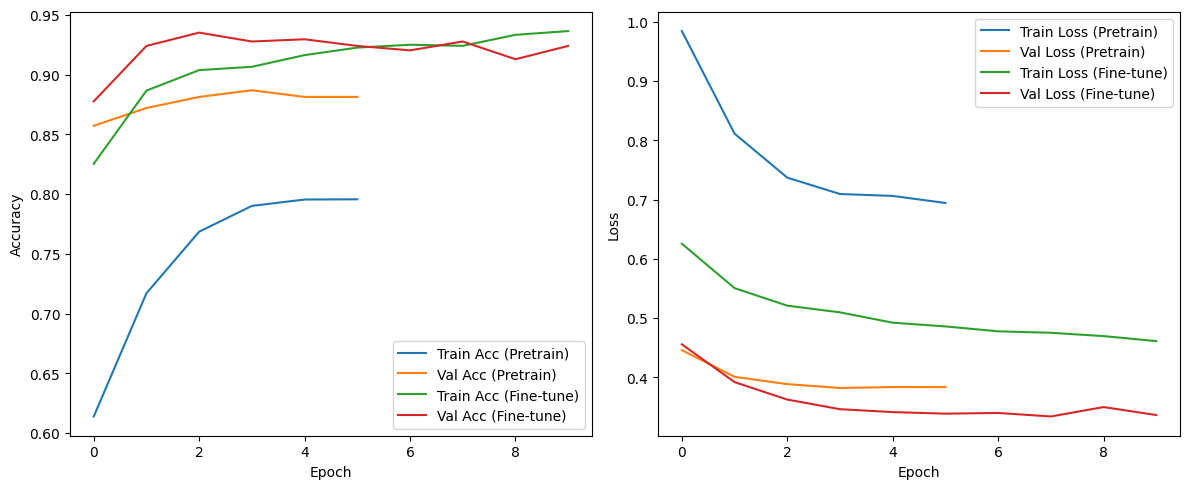

Found 1668 files belonging to 2 classes.
53/53 - 14s - 256ms/step - accuracy: 0.8933 - loss: 0.4362
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━

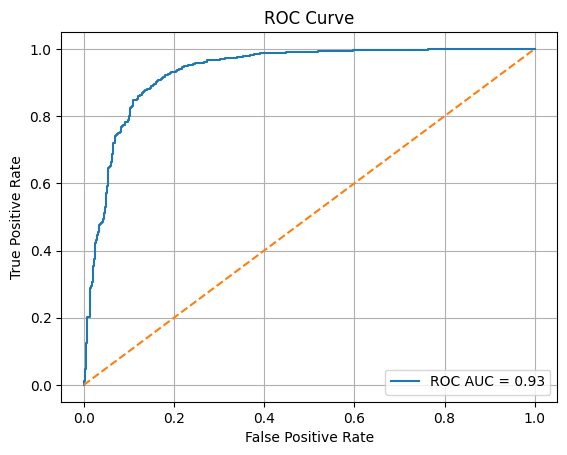

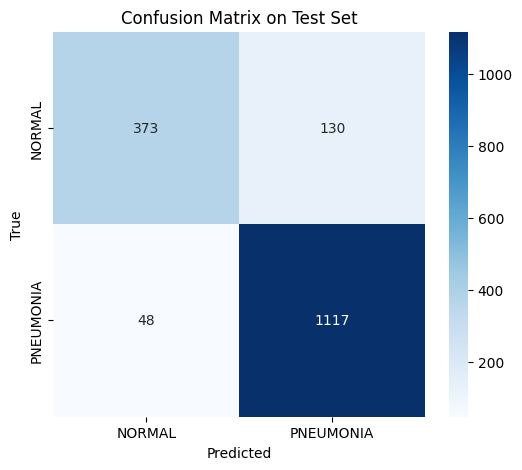

In [7]:
from tensorflow import keras
import tensorflow as tf
import zipfile
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import shutil
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# 1. Hyperparameters
img_size = (224, 224)
batch_size = 32
initial_epochs = 20
fine_tune_epochs = 10
initial_lr = 1e-4

# 2. Giải nén dữ liệu nếu cần
zip_file_path = "/content/drive/MyDrive/archive (1).zip"
data_dir = "/content/chest_xray/chest_xray"
if not os.path.exists(data_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("/content")

# 3. Chia lại dữ liệu thành train/val/test (70/10/20)
base_data_dir = os.path.join(data_dir, "train")  # Dữ liệu gốc ban đầu
new_train_dir = os.path.join(data_dir, "new_train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

def prepare_split_data():
    if os.path.exists(new_train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir):
        print("Dữ liệu đã được chia trước đó. Bỏ qua chia lại.")
        return

    os.makedirs(new_train_dir + "/NORMAL", exist_ok=True)
    os.makedirs(new_train_dir + "/PNEUMONIA", exist_ok=True)
    os.makedirs(val_dir + "/NORMAL", exist_ok=True)
    os.makedirs(val_dir + "/PNEUMONIA", exist_ok=True)
    os.makedirs(test_dir + "/NORMAL", exist_ok=True)
    os.makedirs(test_dir + "/PNEUMONIA", exist_ok=True)

    for label in ["NORMAL", "PNEUMONIA"]:
        images = os.listdir(os.path.join(base_data_dir, label))
        train_val, test = train_test_split(images, test_size=0.2, random_state=42)
        train, val = train_test_split(train_val, test_size=0.125, random_state=42)  # 0.125 của 80% là 10%

        for split, name in zip([train, val, test], [new_train_dir, val_dir, test_dir]):
            for img in split:
                src = os.path.join(base_data_dir, label, img)
                dst = os.path.join(name, label, img)
                shutil.copy2(src, dst)

    print("✅ Đã chia lại dữ liệu thành train (70%), val (10%), test (20%)")

prepare_split_data()

# 4. Gán đường dẫn
train_path = new_train_dir
val_path = val_dir
test_path = test_dir

# ⚖️ 5. Cân bằng dữ liệu lớp thiểu số (NORMAL)
normal_dir = os.path.join(train_path, 'NORMAL')
pneumonia_dir = os.path.join(train_path, 'PNEUMONIA')

def replicate_minority_class(class_dir, target_count):
    files = os.listdir(class_dir)
    current_count = len(files)
    if current_count >= target_count:
        print("Không cần nhân bản.")
        return
    print(f"Nhân bản {target_count - current_count} ảnh từ lớp {os.path.basename(class_dir)}...")
    i = 0
    while len(os.listdir(class_dir)) < target_count:
        src_file = os.path.join(class_dir, random.choice(files))
        dst_file = os.path.join(class_dir, f"copy_{i}_{os.path.basename(src_file)}")
        shutil.copy2(src_file, dst_file)
        i += 1

n_normal = len(os.listdir(normal_dir))
n_pneumonia = len(os.listdir(pneumonia_dir))
replicate_minority_class(normal_dir, n_pneumonia)

# 6. Load dữ liệu
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)
val_ds = keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

# 7. Tiền xử lý và augmentation
from tensorflow.keras.applications.resnet50 import preprocess_input

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.2),
    layers.RandomContrast(factor=0.2),
    layers.RandomTranslation(0.1, 0.1),
])

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (data_augmentation(preprocess_input(x)), y)).shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y)).prefetch(AUTOTUNE)

# 8. Xây dựng mô hình
base_model = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(1e-4))(x)
model = keras.Model(inputs, outputs)

# 9. Compile + huấn luyện ban đầu
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=initial_lr, decay_steps=1000)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# ⚖️ Dùng class_weight để tránh bias nếu mất cân bằng vẫn còn
class_weights = {0: 2.0, 1: 1.0}

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs,
    callbacks=[early_stopping],
    class_weight=class_weights
)

# 10. Fine-tuning
base_model.trainable = True
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs + fine_tune_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[early_stopping],
    class_weight=class_weights
)

# 11. Biểu đồ kết quả
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc (Pretrain)')
plt.plot(history.history['val_accuracy'], label='Val Acc (Pretrain)')
plt.plot(history_fine.history['accuracy'], label='Train Acc (Fine-tune)')
plt.plot(history_fine.history['val_accuracy'], label='Val Acc (Fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss (Pretrain)')
plt.plot(history.history['val_loss'], label='Val Loss (Pretrain)')
plt.plot(history_fine.history['loss'], label='Train Loss (Fine-tune)')
plt.plot(history_fine.history['val_loss'], label='Val Loss (Fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 12. Đánh giá mô hình trên test set
test_ds_raw = keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",
    shuffle=False
)
class_names = test_ds_raw.class_names
test_ds = test_ds_raw.map(lambda x, y: (preprocess_input(x), y)).prefetch(AUTOTUNE)

model.evaluate(test_ds, verbose=2)
y_true, y_pred, y_scores = [], [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_scores.extend(preds.flatten())
    y_pred.extend((preds > 0.5).astype(int).flatten())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=class_names)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Set')
plt.show()

# 13. Lưu mô hình
model.save('my_resnet50_finetuned_reliable.keras')
